<a href="https://colab.research.google.com/github/Koftarik/BHS_intro/blob/main/intro_BHS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Горбунцов Александр БИВ206

# Привет уважаемый соискатель!
 Тебе предстоит пройти пару простых заданий по глубокому обучению. Это нормально не всегда понимать сразу как
 сделать ту или иную часть, видь у тебя есть возможность разобраться во всём самому! А этот навык куда ценнее
 знаний.
 Отметим сразу, что весь код написанный нами, есть лишь один из возможных путей решения задачи и ты не обязан ему
 следовать. Возможно, ты решишь использовать другие, более удобные, решения. Но как и в случае использования
 наших подсказок, так и без них, мы рекомендуем понимать, что ты пишешь и зачем. Мы будем спрашивать на собесе!
 Но ты не пугайся) Лучше разберись что и как.

In [1697]:
import pandas as pd
import torch
from torch.utils.data import Dataset
import torch.nn as nn

# Задания и оценивание
В тестировании присутствует 3 части:
- Составление датаеста
- Конструкция архитектуры нейросети
- Обучение и аналитика

Каждая из них представляет собой важный этап работы Ml-щика нашей команды, поэтому постарайся сделать их все.
Все они приносят равное количество баллов. В каждой части есть задание со звёздочкой, его делать не обязательно -
 но если ты всё-таки его сделаешь, то это поможет нам оценить твои компетенции.


Скажем пару слов о данных. Признаки представляют из себя из себя 11 непрерывных переменных, таргет - целочисленную оценку от 1 до 10. Подумай, что это за тип задачи.

*Ответ:* Предсказание таргета по совокупности признаков - это задача регрессии.

In [1698]:
def seed_everything(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

seed_everything(123456)

# Составление датаеста

- Загрузи данные из файла our data. (тут тебе может помочь библиотека pandas)
- Раздели их по переменным X и Y.
- Сконструируй класс MyDataset. (про такого функионал класса можешь почитать [тут](https:pytorch.org/tutorials/beginner/basics/data_tutorial.html))

- "*" Импортируй линейную регрессию из библиотеки sklearn и обучи её на тех же данных. Ура! теперь у нас есть безлайн!


Загрузите данные и разделите на X, Y

In [1699]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1700]:
data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/data/my_data.csv", skiprows=1, delimiter=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   1599 non-null   float64
 1   feature_2   1599 non-null   float64
 2   feature_3   1599 non-null   float64
 3   feature_4   1599 non-null   float64
 4   feature_5   1599 non-null   float64
 5   feature_6   1599 non-null   float64
 6   feature_7   1599 non-null   float64
 7   feature_8   1599 non-null   float64
 8   feature_9   1599 non-null   float64
 9   feature_10  1599 non-null   float64
 10  feature_11  1599 non-null   float64
 11  target      1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [1701]:
data.head(5)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [1702]:
X = data.drop(['target'], axis=1)
Y = data['target']

Создайте класс DataSet - https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [1703]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.from_numpy(x.values)
        y = torch.from_numpy(y.values)
        self.y = y.view((len(y), 1))   #Исправление Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])).

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

Линейная регрессия из sklearn

In [1704]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()

model_LR.fit(X, Y)

score = model_LR.score(X, Y)

print("R-квадрат:", score)

R-квадрат: 0.3605517030386879


# Сконструируйте класс нейронной сети
В этом задании тебе предстоит сконструировать полносвязную двухслойную нейронную сеть.

- Вспомните какие сущности необходимы для обучения нейронной сети и включите их в атрибуты класса.
- Основываясь на типе данной задачи выберете подходящую лосс функцию.
- На основе требований первых двух пунктов заполните методы forward и training_step
- "*" Настрой обучение батчами (это не обязательно делать в противном случае)

Напоминаем, что не обязательно пользоваться предлагаемым шаблоном! Если вы знаете более быстрые и простые пути,
то будет интересно на них посмотреть.

Создание класса сети

In [1705]:
import torch.optim as optim

In [1706]:
class MyNet(nn.Module):
    #input_size=количество features, output_size=количество целевых переменных, hidden_size=кол-во нейронов в скрытом слое
    def __init__(self, input_size=11, output_size=1, hidden_size=7):
        super().__init__()

        self.layers = nn.Sequential(
          nn.Linear(input_size, hidden_size),
          nn.ReLU(),
          nn.BatchNorm1d(hidden_size),
          nn.Linear(hidden_size, output_size)
        )
        self.double()
        #дефолт для Linear - float32, а у нас float64. чтобы получить норм делаем double

        self.optimizer = optim.Adam(self.parameters(), lr=1.0e-2)
        self.loss = nn.L1Loss()

    def forward(self, x):
        """
        Прямой проход по всем слоям сети для получения предсказания.
        :param x:
        Входящие данные.
        :return:
        Предсказанные значения для входящих данных.
        """
        return self.layers(x)

    def training_step(self, train_data):
        """
        Реализация одного шага обучения.
        :param train_data:
        Данные для прохода.
        :return:
        Значение лосс функции этого шага обучения.
        """
        x, y = train_data
        y_hat = self.layers(x)
        loss = self.loss(y_hat, y)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        return loss

    def validation_step(self, validation_data):

        x, y = validation_data
        y_hat = self.layers(x)
        loss = self.loss(y_hat, y)

        y_rounded = y_hat.round()
        correct = 0
        for elem in y:
          if y[elem]==y_rounded[elem]:
            correct+=1

        accuracy = correct / len(y)

        output = dict({
            'valid_loss': loss,
            'valid_acc': accuracy,
        })
        return output

# Обучение и аналитика
В этом задании тебе предстоит обучить сконструированную архитектуру.

- Создай объект класса MyDataset и MyNet, а также других атрибутов, если ваше решение их предусматривает.
- Напишите цикл обучения нейронной сети.
- Обучите нейронную сеть и оцените финальной качество на валидационном датасете.
- "*" Каждый N-ый шаг изображайте на графике, как менялось значение лосс функции на тестовых данных и
на части валидационных данных.

Создание датасета и загрузчиков данных

In [1707]:
from torch.utils.data import DataLoader, random_split

In [1708]:
batch_size=32

In [1709]:
dataset = MyDataset(X, Y)

train_dataset, test_dataset = torch.utils.data.random_split(dataset,[int(len(dataset)*0.7),(int(len(dataset))-int(len(dataset)*0.7))])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
batch_val_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=True)

In [1710]:
print('Длина тренировочных данных')
print(len(train_dataset))
print('Длина тестовых данных')
print(len(test_dataset))
print('Число шагов обучения в одной эпохе')
print(round(len(train_dataset) / batch_size))

Длина тренировочных данных
1119
Длина тестовых данных
480
Число шагов обучения в одной эпохе
35


Создание и обучение сети

In [1711]:
model = MyNet(hidden_size=64)

num_epochs = 3
train_losses = []
val_losses = []
val_acc = []

In [1712]:
for epoch in range(num_epochs):

  model.train()

  print(f'Starting epoch {epoch+1}')

  for i, data in enumerate(train_loader, 0):

    loss=model.training_step(data)
    train_losses.append(loss.item())

    if i % 10 == 0:

      print('Loss after batch %3d: %.3f' %
        (i + 1, train_losses[-1]))

model.eval()

print('Training process has finished.')

Starting epoch 1
Loss after batch   1: 5.553
Loss after batch  11: 4.709
Loss after batch  21: 2.495
Loss after batch  31: 1.223
Starting epoch 2
Loss after batch   1: 0.970
Loss after batch  11: 0.834
Loss after batch  21: 0.546
Loss after batch  31: 0.710
Starting epoch 3
Loss after batch   1: 0.797
Loss after batch  11: 0.608
Loss after batch  21: 0.782
Loss after batch  31: 0.793
Training process has finished.


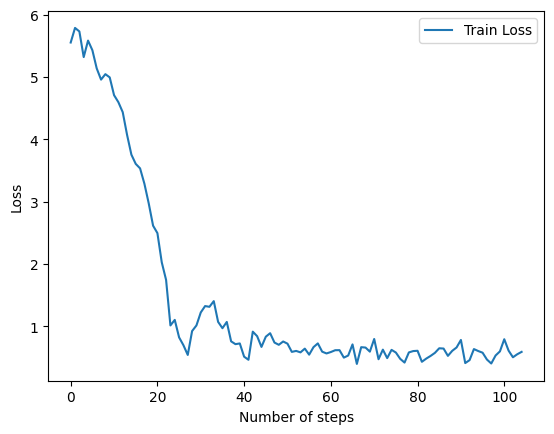

In [1713]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_losses)), train_losses, label='Train Loss')
plt.xlabel('Number of steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

Оценка качества

In [1714]:
print('Starting batch validation.')

with torch.no_grad():
  for i, data in enumerate(batch_val_loader, 0):

    output = model.validation_step(data)
    val_losses.append(output['valid_loss'].item())
    val_acc.append(output['valid_acc'])

    if i % 3 == 0:

      print('Loss after batch %7d: %.3f' %
        (i + 1, val_losses[-1]))

      print('Accuracy after batch %3d: %.3f' %
        (i + 1, val_acc[-1]))

print('Validation process has finished')

print('Batch validation accuracy: %.3f' %
        (sum(val_acc)/len(val_acc)))

Starting batch validation.
Loss after batch       1: 0.531
Accuracy after batch   1: 0.625
Loss after batch       4: 0.528
Accuracy after batch   4: 0.062
Loss after batch       7: 0.609
Accuracy after batch   7: 0.719
Loss after batch      10: 0.476
Accuracy after batch  10: 0.844
Loss after batch      13: 0.623
Accuracy after batch  13: 0.469
Validation process has finished
Batch validation accuracy: 0.533


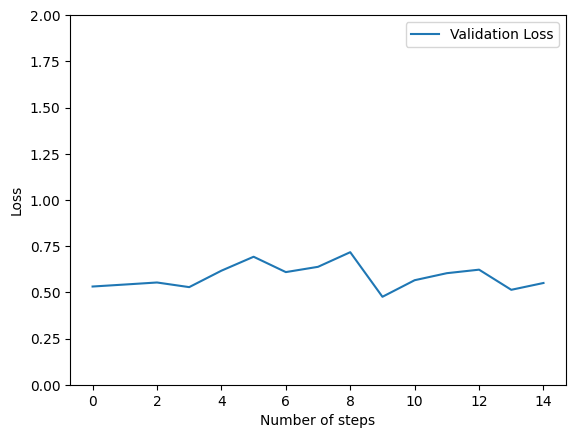

In [1715]:
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.xlabel('Number of steps')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend()
plt.show()

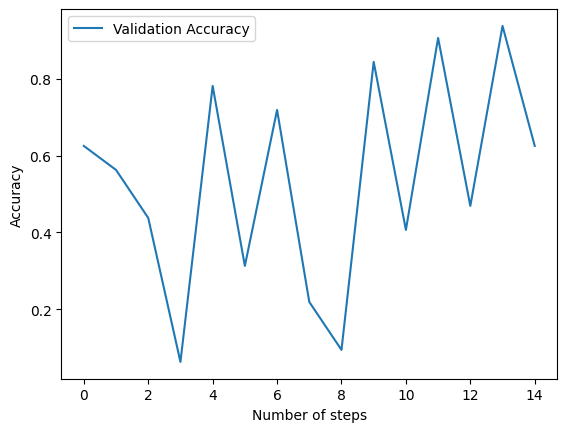

In [1716]:
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.xlabel('Number of steps')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Если отдавать модели данные по чуть-чуть, то точность оставляет желать лучшего (53,3%)

Однако если закинуть сразу все данные, то точность получается 100%

In [1717]:
print('Starting val_data validation.')

with torch.no_grad():
  for i, data in enumerate(val_loader, 0):

    output = model.validation_step(data)

    print('Val_data validation loss - {:.3f}'.format(output['valid_loss'].item()))
    print('Val_data validation accuracy - {:.3f}'.format(output['valid_acc']))

Starting val_data validation.
Val_data validation loss - 0.584
Val_data validation accuracy - 1.000


Не в зависимости от того что тебе удалось сделать , скажи пару слов о том, в чём ты смог разобраться (если такие открытия были) и о том, какие изменения / дополнения и почему ты привнёс в заготовленный нами шаблон.

1. В чем я смог разобраться: не могу сказать что были какие-то открытия, но я упорядочил свои знания и глубже вник в предметную область. Теперь я больше понимаю то, чем я раньше пользовался как данностью, что и как именно работает, почему надо писать именно такие цифры и использовать именно такие функции.

2. Изменения в шаблоне:

* Добавил пару функций чтобы инормация о данных была перед глазами.

* Не использовал tqdm так как обучение происходит за секунду, и отслеживать прогресс нет смысла.

* Для обучения батчами добавил DataLoader'ы.

* Добавил метод validation_step для оценки качества модели.

* Добавил отдельные циклы для валидации и места для вызова графиков.